In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread("cameraman.tif",0)

In [5]:
# extract the 8 bitplane from here
bpc = []
for i in range(8):
  bpc.append(np.mod(np.floor(img/2**i),2**i))
bpc

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 1., 1., ..., 1., 0., 0.],
        [0., 1., 0., ..., 1., 1., 0.],
        [0., 1., 1., ..., 1., 0., 0.],
        ...,
        [1., 0., 1., ..., 1., 0., 1.],
        [0., 1., 1., ..., 0., 1., 0.],
        [0., 1., 1., ..., 0., 1., 0.]]),
 array([[3., 3., 3., ..., 1., 2., 2.],
        [0., 2., 3., ..., 2., 2., 2.],
        [3., 3., 3., ..., 1., 2., 2.],
        ...,
        [0., 1., 2., ..., 1., 2., 0.],
        [2., 3., 0., ..., 1., 0., 0.],
        [2., 3., 0., ..., 1., 0., 0.]]),
 array([[3., 3., 3., ..., 2., 3., 3.],
        [4., 3., 3., ..., 3., 3., 3.],
        [3., 3., 3., ..., 2., 3., 3.],
        ...,
        [6., 0., 7., ..., 0., 1., 6.],
        [7., 7., 0., ..., 0., 0., 6.],
        [7., 7., 0., ..., 0., 0., 6.]]),
 arr

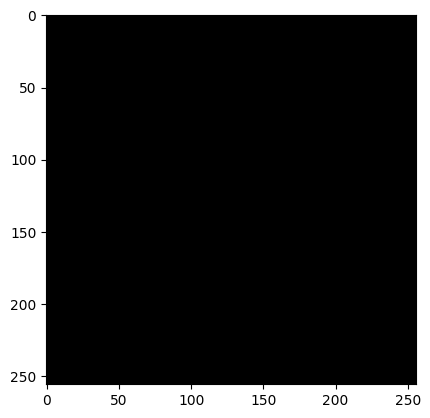

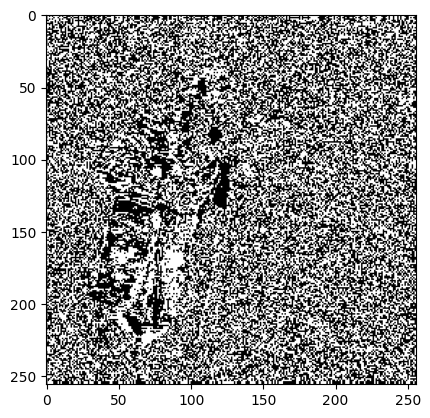

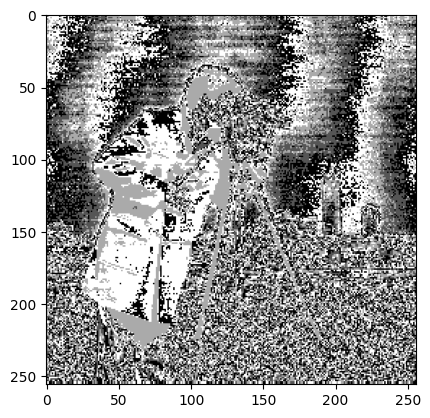

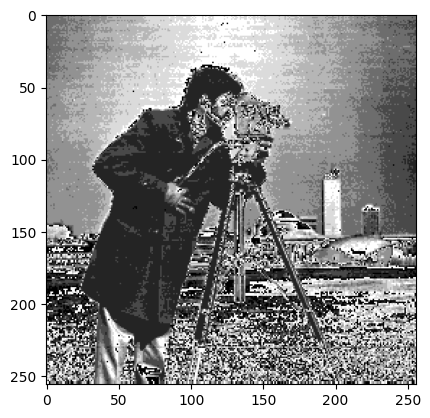

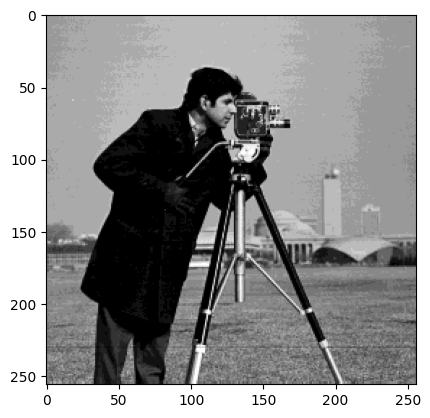

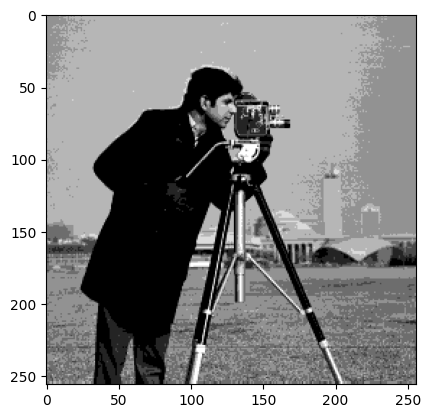

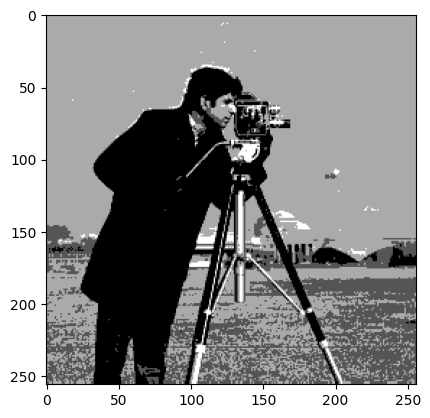

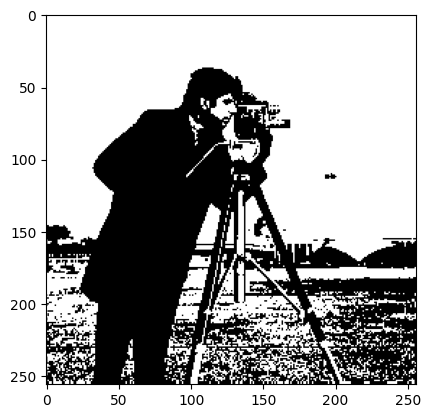

In [6]:
# Display the images here too
for i in range(8):
  plt.imshow(bpc[i],cmap="gray")
  plt.show()

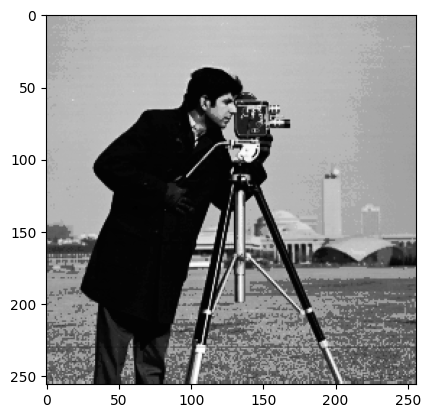

In [16]:
# Display the reconstructed image here now
img_r = 0
for i in range(len(bpc) - 1,-1,-1):
    img_r += bpc[i]*2**i
plt.imshow(img_r,cmap="gray")
plt.show()

In [18]:
img1 = cv2.imread("lena.png",0)
bpcl = []
for i in range(8):
  bpcl.append(np.mod(np.floor(img1/2**i),2**i))
bpcl

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 1., 1., 1.],
        [0., 0., 0., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]),
 array([[3., 3., 3., ..., 2., 2., 2.],
        [3., 3., 3., ..., 2., 2., 2.],
        [1., 1., 3., ..., 2., 2., 2.],
        ...,
        [3., 3., 0., ..., 2., 2., 2.],
        [2., 2., 3., ..., 1., 1., 1.],
        [2., 2., 3., ..., 1., 1., 1.]]),
 array([[1., 1., 1., ..., 3., 3., 3.],
        [1., 1., 1., ..., 3., 3., 3.],
        [0., 0., 1., ..., 3., 3., 3.],
        ...,
        [5., 5., 6., ..., 3., 3., 3.],
        [5., 5., 5., ..., 2., 2., 2.],
        [5., 5., 5., ..., 2., 2., 2.]]),
 arr

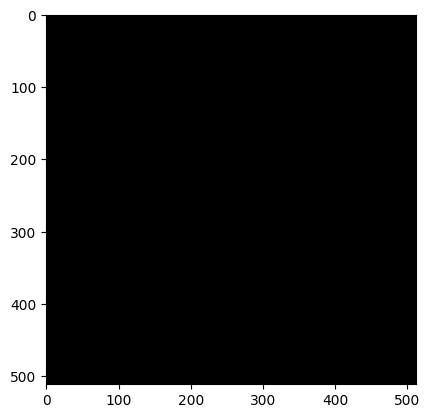

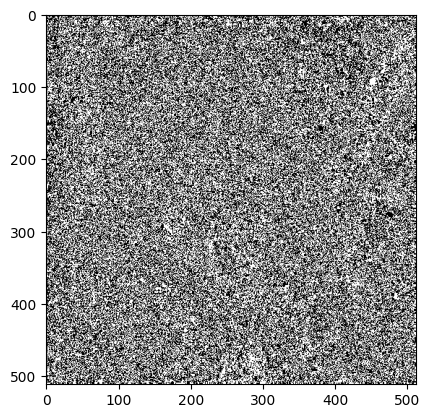

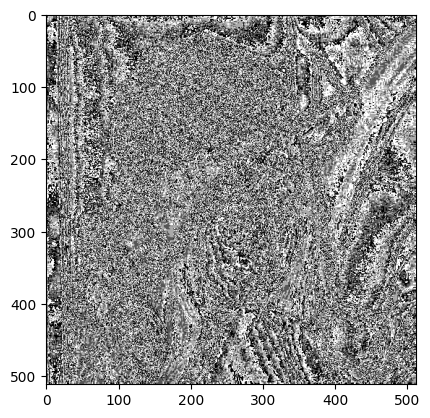

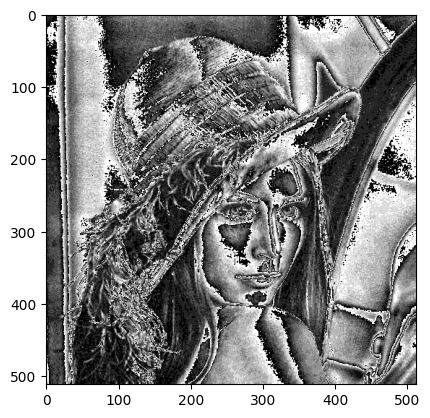

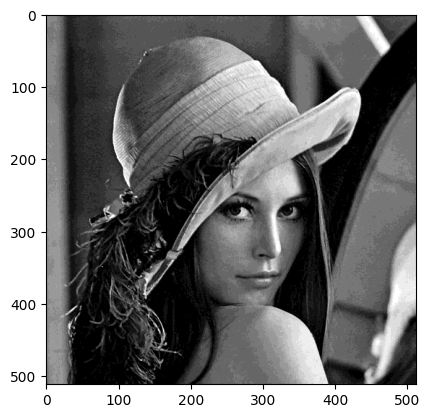

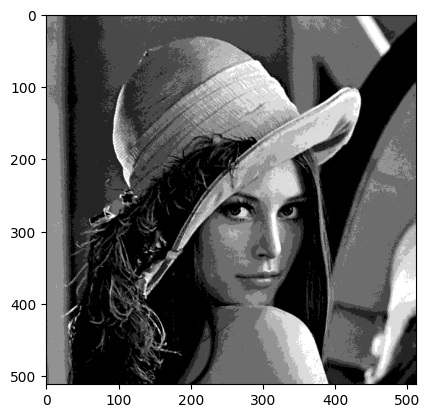

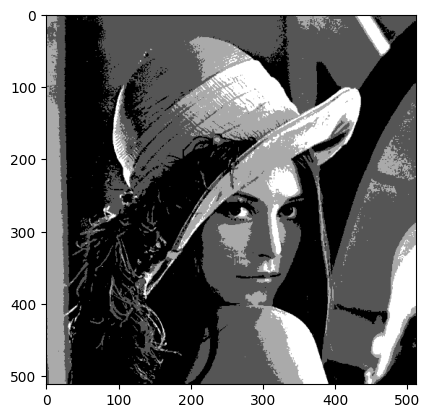

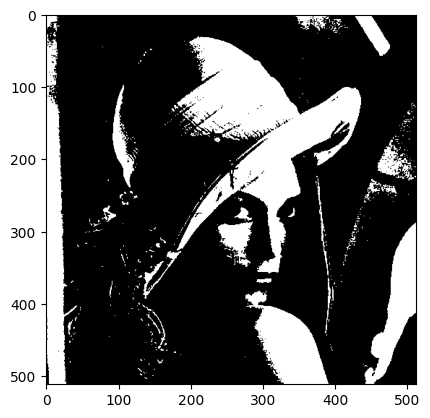

In [24]:
for i in range(8):
  plt.imshow(bpcl[i],cmap="gray")
  plt.show()

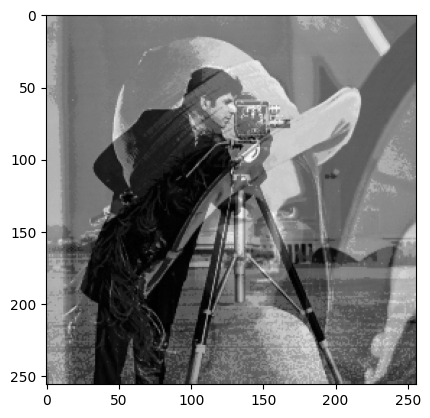

In [25]:
img_r = 0
for i in range(len(bpc) - 1,-1,-1):
    if i % 2:
      img_r += cv2.resize(bpcl[i], (256, 256))*2**i
    else:
      img_r += bpc[i]*2**i
plt.imshow(img_r,cmap="gray")
plt.show()

Task 2

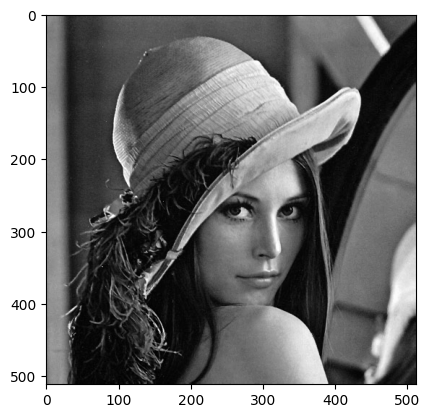

In [26]:
img1 = cv2.imread("lena.png",0)
plt.imshow(img1,cmap="gray")

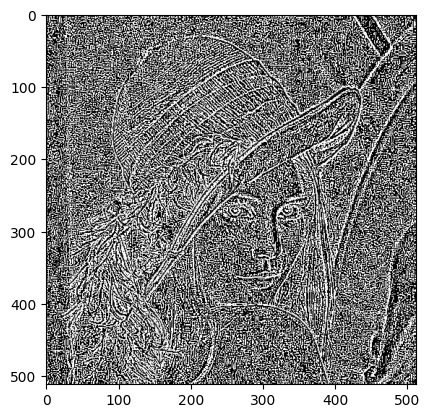

In [31]:
h = 1/9 * np.ones([3,3])
lpf = cv2.filter2D(img1,-1,h)
plt.imshow(img1 - lpf,cmap="gray")

Whenever i pass the image through the High pass fliter and i can find the edge detected image here

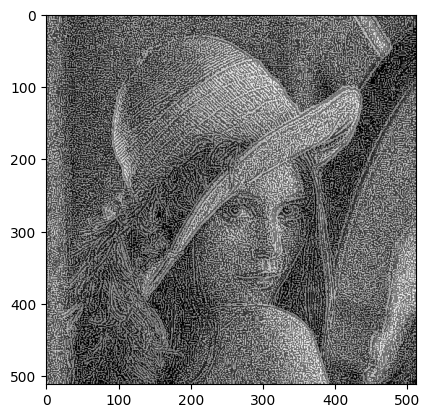

In [35]:
alpha = 0.5
beta = 0.5
hpf = img1 - lpf
img_out = alpha*hpf + beta*lpf
plt.imshow(img_out,cmap="gray")

Logarthmetic Transformation

In [44]:
m,n = img1.shape
img_out = np.zeros([m,n])
c = 255/np.log(1+255)

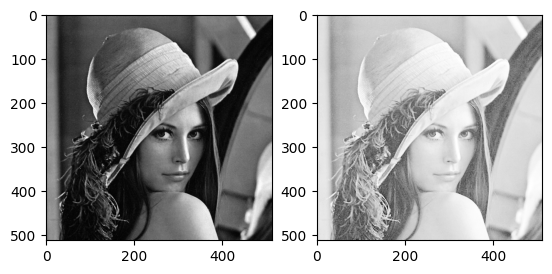

In [45]:
for i in range(0,m):
  for j in range(0,n):
    img_out[i,j] = c*np.log(1+img1[i,j])
plt.subplot(1,2,1),plt.imshow(img1,cmap="gray")
plt.subplot(1,2,2),plt.imshow(img_out,cmap="gray")
plt.show()

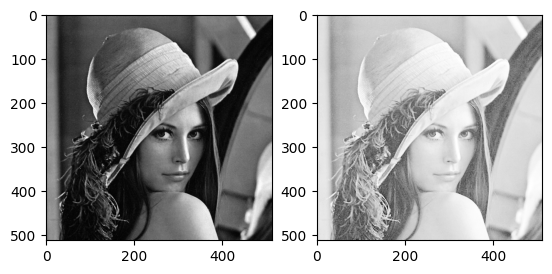

In [47]:
for i in range(0,m):
  for j in range(0,n):
    img_out[i,j] = 1*np.log(1+img1[i,j])
plt.subplot(1,2,1),plt.imshow(img1,cmap="gray")
plt.subplot(1,2,2),plt.imshow(img_out,cmap="gray")
plt.show()

In [ ]:
 Pattern Recognization  = Duda and Hart

Gamma Transformation

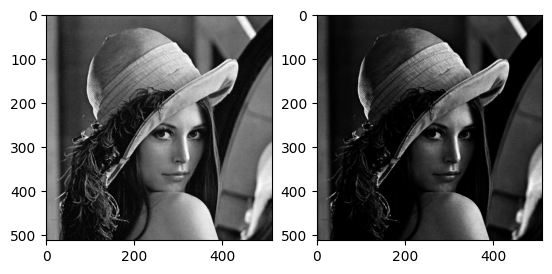

In [53]:
gamma = 2
for i in range(0,m):
  for j in range(0,n):
    img_out[i,j] = c*img1[i,j]**gamma
plt.subplot(1,2,1),plt.imshow(img1,cmap="gray")
plt.subplot(1,2,2),plt.imshow(img_out,cmap="gray")
plt.show()

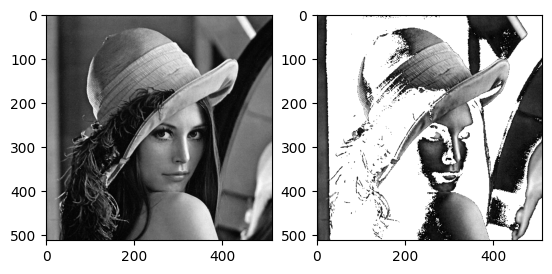

In [59]:
T1 = 100
T2 = 150
for i in range(0,m):
  for j in range(0,n):
    if img1[i,j] < T1 and img1[i,j] < T2:
      img_out[i,j] = 255
    else:
      img_out[i,j] = img1[i,j]

plt.subplot(1,2,1),plt.imshow(img1,cmap="gray")
plt.subplot(1,2,2),plt.imshow(img_out,cmap="gray")
plt.show()